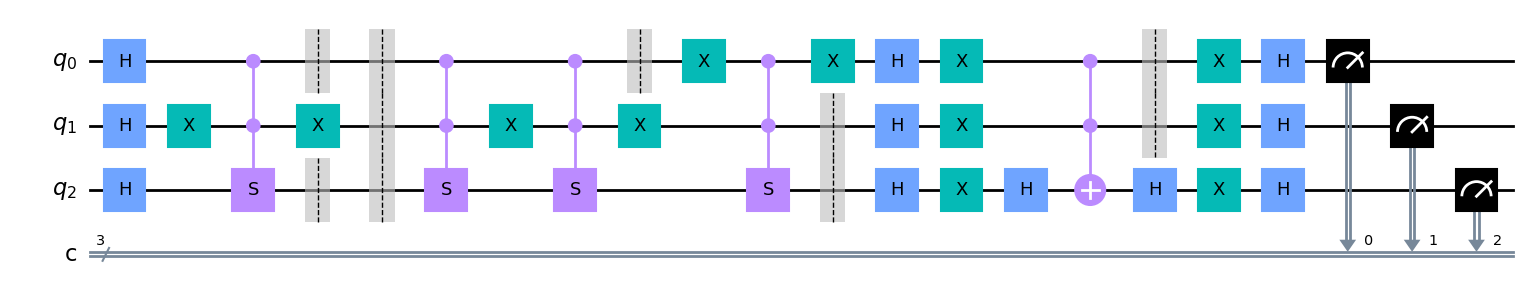

In [1]:
from qiskit import Aer, execute
Aer.backends()
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit import Aer, execute
from qiskit.tools import job_monitor
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_gate_map

from qiskit.circuit.library.standard_gates import SGate, TGate

csgate = SGate().control(2) # the parameter is the amount of control points you want

len = 3
simulator = QasmSimulator()
circuit = QuantumCircuit(len, len)

# Add a H gate on qubit 0
for i in range(len): 
    circuit.h(i)

#query vector
circuit.x(1)
circuit.append(csgate, list(range(len)))
circuit.x(1)

circuit.barrier(0)
circuit.barrier(2)
for i in range(len): 
    circuit.barrier(i)

#database vectors
#v1
circuit.append(csgate, list(range(len)))

#v2
circuit.x(1)
circuit.append(csgate, list(range(len)))
circuit.x(1)

circuit.barrier(0)

#v3    
circuit.x(0)
circuit.append(csgate, list(range(len)))
circuit.x(0)

for i in range(1, len):
    circuit.barrier(i)  
    
for i in range(len): 
    circuit.h(i)
    circuit.x(i)

circuit.h(len-1)
circuit.mct(list(range(len-1)), len-1)
circuit.h(len-1)

for i in range(len-1):
    circuit.barrier(i)  

for i in range(len):
    circuit.x(i)
    circuit.h(i)
    
# Map the quantum measurement to the classical bits
circuit.measure(list(range(len)), list(range(len)))

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)

# Draw the circuit
#circuit.draw()
circuit.draw(output='mpl')
#print(circuit)


In [2]:
print(circuit.decompose())

     ┌─────────┐                            ░       ░                       »
q_0: ┤ U2(0,π) ├──────────────■─────────────░───────░──■────────────────────»
     ├─────────┤┌───────────┐ │       ┌───────────┐ ░  │       ┌───────────┐»
q_1: ┤ U2(0,π) ├┤ U3(π,0,π) ├─■───────┤ U3(π,0,π) ├─░──■───────┤ U3(π,0,π) ├»
     ├─────────┤└───────────┘ │P(π/2) └─────░─────┘ ░  │P(π/2) └───────────┘»
q_2: ┤ U2(0,π) ├──────────────■─────────────░───────░──■────────────────────»
     └─────────┘                            ░       ░                       »
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                    ░      ┌───────────┐         ┌───────────┐┌─────────┐»
«q_0: ─■─────────────░──────┤ U3(π,0,π) ├─■───────┤ U3(π,0,π) ├┤ U2(0,π) ├»
«      │       ┌───────────┐└───────────┘ │       └─────░─────┘├─────────┤»
«q_1: ─■───────┤ U3(π,0,π) ├──────────────■─────────────░──────┤ U2(0,

In [3]:
print(circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
gate mcphase(param0) q0,q1,q2 { cp(pi/4) q1,q2; cx q1,q0; cp(-pi/4) q0,q2; cx q1,q0; cp(pi/4) q0,q2; }
gate ccs q0,q1,q2 { mcphase(pi/2) q0,q1,q2; }
qreg q[3];
creg c[3];
h q[0];
h q[1];
h q[2];
x q[1];
ccs q[0],q[1],q[2];
x q[1];
barrier q[0];
barrier q[2];
barrier q[0];
barrier q[1];
barrier q[2];
ccs q[0],q[1],q[2];
x q[1];
ccs q[0],q[1],q[2];
x q[1];
barrier q[0];
x q[0];
ccs q[0],q[1],q[2];
x q[0];
barrier q[1];
barrier q[2];
h q[0];
x q[0];
h q[1];
x q[1];
h q[2];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
h q[2];
barrier q[0];
barrier q[1];
x q[0];
h q[0];
x q[1];
h q[1];
x q[2];
h q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



In [4]:
print(counts)

{'101': 550, '111': 152, '110': 153, '000': 21, '011': 35, '100': 28, '010': 33, '001': 28}


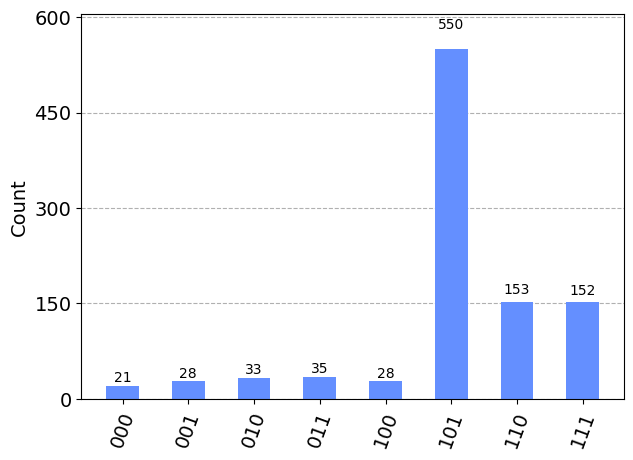

In [5]:
import matplotlib.pyplot as plt
plot_histogram(job.result().get_counts())